# MATH 360 Introduction to Mathematical Modelling

### Modelling Assignment 6: Logistic Regression

**Jincheng Hong**  
Collaborated with: Ethan Billings, Haad Bhutta

### Part 1: Construct the Model - Logistic Regression

The `card_transdata_1.csv` dataset contains features that can be used to determine if a credit card transaction is genuine or fraud.  In particular, the dataset includes the following columns:
- `distance_from_home`: the distance from home where the transaction happened.
- `distance_from_last_transaction`: the distance from last transaction happened.
- `ratio_to_median_purchase_price`: ratio of purchased price transaction to median purchase price.
- `repeat_retailer`: is the transaction happened from same retailer.
- `used_chip`: is the transaction through chip (credit card).
- `used_pin_number`: is the transaction happened by using PIN number.
- `online_order`: is the transaction an online order.
- `fraud`: is the transaction fraudulent.

Construct a mathematical model using logistic regression for following **Tasks** below.


Present your work in a Jupyter notebook that includes:
- Problem statement
- Variable and parameter definitions 
- Assumptions and constraints
- Logistic regression
- Analysis

Students work individually and submit their work in class.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

print("packages imported")

packages imported


In [2]:
#fraud  data 
fraud_data = pd.read_csv('card_transdata_1.csv')

fraud = pd.DataFrame(fraud_data)
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              10000 non-null  float64
 1   distance_from_last_transaction  10000 non-null  float64
 2   ratio_to_median_purchase_price  10000 non-null  float64
 3   repeat_retailer                 10000 non-null  int64  
 4   used_chip                       10000 non-null  int64  
 5   used_pin_number                 10000 non-null  int64  
 6   online_order                    10000 non-null  int64  
 7   fraud                           10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


In [3]:
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


## 1. Problem Statement 

**Task:** Write a problem statement.

Build a logistic regression model by using the listed features to predict whether a credit card transaction is fraud or not.

## 2. Variables and Parameters  
**Task:** State parameters and variables.

| Description | Symbol | Units | Type|
|-------------|--------|-------|-------|
| is fraud or not | $Y$ | - | target (dependent) variable |
| distance from home| $X1$ |-| feature (independent) variable |
| distance from last transaction | $X2$ | -| feature (independent) variable |
| ratio to median purchase price | $X3$ |-| feature (independent) variable |
| repeat retailer   | $X4$ |-| feature (independent) variable |
| used chip   | $X5$ | - | feature (independent) variable |
| used pin number   | $X6$ |-| feature (independent) variable |
| online order | $X7$ |-| feature (independent) variable |
| Regularization parameter| $\alpha$| - | parameter |
| Weights | $\bf{W}$ | - | parameter |
| Bias | $b$ | - | parameter |

Note: $Y=0$ means transaction is not fraud while $Y=1$ means is fraud.

## 3. Assumptions and Constraints  
**Task:** State assumptions and constraints. 

- The model follows logistic model and is suitable for logistic regression.
- These above features are the only features that determine if a credit card transaction is fraud.
- These above features are independent and each observation is independent.
- We can split data into training set and a testing set with a 70-30 ratio.
    - assume the model score can represent how well our model is.

## 4. Build Solutions

**Task:** Define the data matrix `X` and target vector `y`.

In [4]:
X = fraud.copy().drop(columns='fraud')
y = fraud['fraud']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              10000 non-null  float64
 1   distance_from_last_transaction  10000 non-null  float64
 2   ratio_to_median_purchase_price  10000 non-null  float64
 3   repeat_retailer                 10000 non-null  int64  
 4   used_chip                       10000 non-null  int64  
 5   used_pin_number                 10000 non-null  int64  
 6   online_order                    10000 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 547.0 KB


### 4.1 Determine regularization
**Task:** Determine the appropriate amount of regularization to include and then construct a logistic regression model using `LogisticRegression`.  Print out the weights and the bias values determined from your logistic regression.

In [5]:
# using the default C=1
model = LogisticRegression(C=1,max_iter=1000).fit(X, y)

/Users/jinchenghong/anaconda3/lib/python3.10/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Users/jinchenghong/anaconda3/lib/python3.10/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Users/jinchenghong/anaconda3/lib/python3.10/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Users/jinchenghong/anaconda3/lib/python3.10/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Users/jinchenghong/anaconda3/lib/python3.10/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


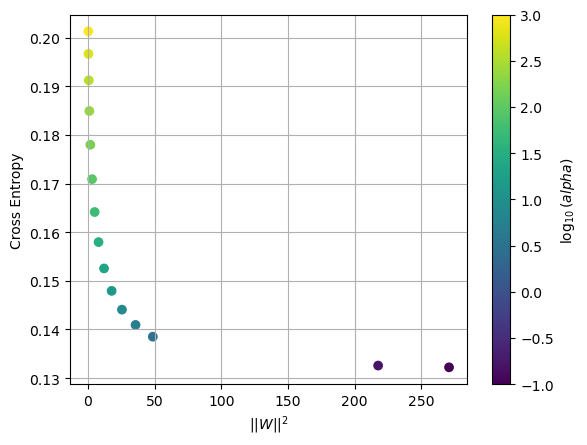

In [6]:
def costCE(W,b,X,y):
    N,p = X.shape
    W = np.array(W).reshape(p,1)
    y = np.array(y).reshape(N,1)
    S = 1/(1 + np.exp(-(X@W + b)))
    L = -1/N*np.sum(y*np.log(S) + (1 - y)*np.log(1 - S))
    return L

CEs = []
Rs = []
alphas = np.logspace(-1,3,20)
for alpha in alphas:
    model = LogisticRegression(C=1/alpha,max_iter=1000).fit(X, y)
    W = model.coef_
    b = model.intercept_
    CE = costCE(W,b,X,y)
    R = np.linalg.norm(W)**2
    CEs.append(CE)
    Rs.append(R)

plt.scatter(Rs,CEs,c=np.log10(alphas))
plt.grid(True), plt.colorbar(label='$\log_{10}(alpha)$')
plt.xlabel('$|| W ||^2$')
plt.ylabel('Cross Entropy')
plt.show()

It seems like some bugs occured, but luckily we can still see the shape. It seems that $\alpha = 1$ or $\alpha = 10^{0.5}$ is good enough. For convenience, I would choose $\alpha = 1$.

### 4.2 Split data, train model, and test
**Task:** Using a training set and testing split of your choosing, split the data into a training set and a testing set. Evaluate your model and explicitly state (i.e., calculate and print the result) the percentage of correctly classified fraudulent transactions. 

In [7]:
# split with 70-30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [8]:
model = LogisticRegression(C=1,max_iter=1000).fit(X_train, y_train)

In [9]:
model.score(X_test,y_test)

0.9533333333333334

It shows that this model correctly predicted 95.13% of the transactions in the testing set.

In [10]:
# The percentage of non-fraud in the set
len(y[y == 0])/len(y)

0.9159

The score for this model is higher, which indicates this model is good.

In [11]:
y_pred = model.predict(X_test)
C = confusion_matrix(y_test,y_pred)
C

array([[2724,   24],
       [ 116,  136]])

This shows that 
|  | pred_negative(non-fraud) | pred_positive(fraud) |
|-------------|--------|-------|
| true_negative(non-fraud) | 2734 | 14 |
| true_positive(fraud)| 132 |120|

In [12]:
120/(132+120)

0.47619047619047616

This model correctly predicted $120/252 = 47.6 \% $ fraud transactions. This seems not very good.

### 4.3 Standardization
**Task:** Scale the matrix `X` and perform a new logistic regression.  Do you achieve the same level of accuracy?  Is this expected?

In [13]:
X_scaled = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)
model = LogisticRegression(C=1,max_iter=1000).fit(X_train, y_train)
model.score(X_test,y_test)

0.9556666666666667

In [14]:
y_pred = model.predict(X_test)
C = confusion_matrix(y_test,y_pred)
C

array([[2732,   11],
       [ 122,  135]])

This shows that 
|  | pred_negative(non-fraud) | pred_positive(fraud) |
|-------------|--------|-------|
| true_negative(non-fraud) | 2733 | 11 |
| true_positive(fraud)| 126 |130|

This model is kind of similar to the previous one with a slight increase of accuracy. I think this model is better because it predicts more true fraud transactions.

This is expected because while most of the columns are binary or close to 1, some are a bit larger like the `distance from home`. This means that these columns with large numbers have higher weight when classifying simply because they have larger numbers.

### 4.4 Determine two features
**Task:** Pick a model: the model without scaled data or the model with scaled data (be sure to justify your choice!). 

Using your chosen model, print out the $W$ and $b$ values.  From your values, determine the $2$ features which have the largest $W$ (in absolute magnitude).  Refit the model with these features and determine the accuracy.  

Compare this model with the previous models.  Is there improvement?  In particular, produce the confusion matrices and discuss the false positives/negatives in the context of the modelling task.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)
model = LogisticRegression(C=1,max_iter=1000).fit(X_train, y_train)

I pick the scaled model. Because this model gives slightly better accuracy and more case of true fraud.

In [16]:
W = model.coef_
b = model.intercept_
W, b

(array([[ 0.8526002 ,  0.34457022,  1.99462004, -0.207983  , -0.53374008,
         -4.34318986,  3.63426697]]),
 array([-6.61876412]))

The largest values in absolute magnitude are associated with $X6$ and $X7$, namely `used_pin_number` and `online_order`.

What about the non-scaled model?

In [17]:
X = fraud.copy().drop(columns='fraud')
y = fraud['fraud']
model = LogisticRegression(C=1,max_iter=1000).fit(X, y)
W = model.coef_
b = model.intercept_
W, b

(array([[ 0.01554429,  0.01830326,  0.73873078, -0.63891638, -1.16879206,
         -5.73884385,  7.23750462]]),
 array([-10.58446694]))

This also suggest that $X6, X7$ are the two features with the largest absolute weight. Now let's train our model using these two features.

In [18]:
X_two = fraud[['used_pin_number','online_order']]
y = fraud['fraud']
X_two.head()

,used_pin_number,online_order
0,0,0
1,0,0
2,0,1
3,0,1
4,0,1


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_two, y, test_size=0.3)
model = LogisticRegression(C=1,max_iter=1000).fit(X_train, y_train)
model.score(X_test,y_test)

0.918

The model score actually decreased! Let's take a closer look at the confusion matrix.

In [20]:
y_pred = model.predict(X_test)
C = confusion_matrix(y_test,y_pred)
C

array([[2754,    0],
       [ 246,    0]])

This is bad because we see that this time the model predicts everything to be negative. This may because the two features are both binary. I think this caused some problem.

But... What if we scale our data?

In [21]:
X_two_scaled = StandardScaler().fit_transform(X_two)
X_train, X_test, y_train, y_test = train_test_split(X_two_scaled, y, test_size=0.3)
model = LogisticRegression(C=1,max_iter=1000).fit(X_train, y_train)
model.score(X_test,y_test)

0.9146666666666666

In [22]:
y_pred = model.predict(X_test)
C = confusion_matrix(y_test,y_pred)
C

array([[2744,    0],
       [ 256,    0]])

And... nothing changes when we scale the data.

### 4.5 Visualization
**Task:** Once you have determine the $2$ features from the previous task, visualize the model and showcase how the model behaves with varying input.  Be creative here! 

#### 4.5.1 Visualization with two binary features

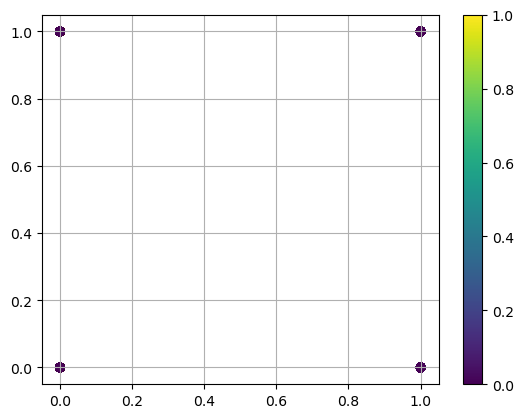

In [23]:
plt.scatter(X['used_pin_number'],X['online_order'],c=y)
plt.grid(True), plt.colorbar()
plt.show()

The above problem is because the these two columns are binary, so there can only be 4 locations on graph and these points overlap together. Visualization about these two is wierd.

#### 4.5.2 Visualization with two non-binary features
Anyway, to visualize, let's choose `distance_from_last_transaction` and `ratio_to_median_purchase_price` because these two columns involve numbers that are not binary. This will give us a good plot.

In [24]:
X_2 = fraud[['distance_from_last_transaction', 'ratio_to_median_purchase_price']]
y = fraud['fraud']
model = LogisticRegression(C=1,max_iter=1000).fit(X_2, y)
W = model.coef_
b = model.intercept_
W,b

(array([[0.01268106, 0.4247406 ]]), array([-3.5904254]))

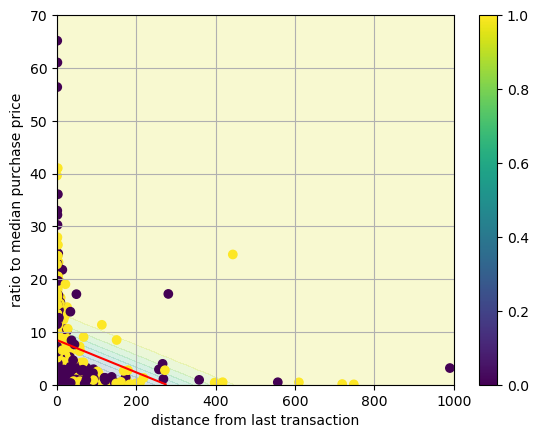

In [25]:
x0 = np.linspace(0,1000,50); x1 = np.linspace(0,70,50);
X0,X1 = np.meshgrid(x0,x1)

W0 = 0.013; W1 = 0.425; b = -3.59
Y = 1/(1 + np.exp(-(W0*X0 + W1*X1 + b)))
plt.contourf(X0,X1,Y,levels=10,alpha=0.2)
plt.contour(X0,X1,Y,levels=[0.5],colors='r')

plt.scatter(X['distance_from_last_transaction'],X['ratio_to_median_purchase_price'],c=y)
plt.xlabel('distance from last transaction')
plt.ylabel('ratio to median purchase price')
plt.grid(True), plt.colorbar()
plt.show()

Let's zoom in too see better.

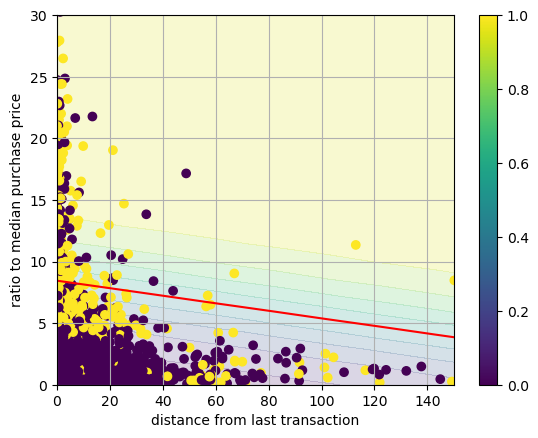

In [26]:
x0 = np.linspace(0,1000,50); x1 = np.linspace(0,70,50);
X0,X1 = np.meshgrid(x0,x1)

W0 = 0.013; W1 = 0.425; b = -3.59
Y = 1/(1 + np.exp(-(W0*X0 + W1*X1 + b)))
plt.contourf(X0,X1,Y,levels=10,alpha=0.2)
plt.contour(X0,X1,Y,levels=[0.5],colors='r')

plt.scatter(X['distance_from_last_transaction'],X['ratio_to_median_purchase_price'],c=y)
plt.xlabel('distance from last transaction')
plt.xlim((0,150))
plt.ylim((0,30))
plt.ylabel('ratio to median purchase price')
plt.grid(True), plt.colorbar()
plt.show()

#### 4.5.3 Visualization with one binary feature and one non-binary feature
What if we pick one binary feature and one non-binary feature? Here, I explore with picking $X3$ and $X7$, namely `ratio to median purchase price` and `online order`. I pick these two because they have the largest weight in the scaled model.

In [27]:
X_3 = fraud[['ratio_to_median_purchase_price', 'online_order']]
y = fraud['fraud']
model = LogisticRegression(C=1,max_iter=1000).fit(X_3, y)
W = model.coef_
b = model.intercept_
W,b

(array([[0.57719699, 5.54081635]]), array([-8.8668141]))

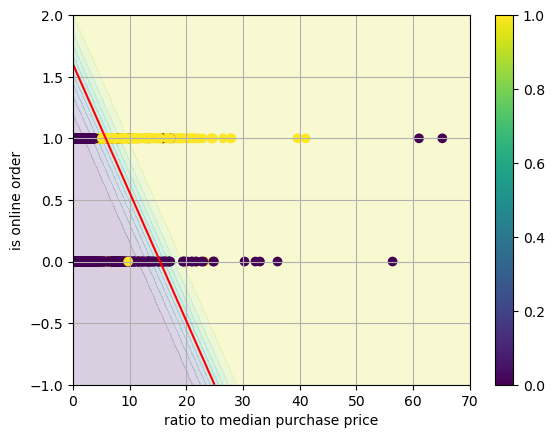

In [28]:
x0 = np.linspace(0,70,50); x1 = np.linspace(-1,2,50);
X0,X1 = np.meshgrid(x0,x1)

W0 = 0.5772; W1 = 5.5408; b = -8.8668
Y = 1/(1 + np.exp(-(W0*X0 + W1*X1 + b)))
plt.contourf(X0,X1,Y,levels=10,alpha=0.2)
plt.contour(X0,X1,Y,levels=[0.5],colors='r')

plt.scatter(X['ratio_to_median_purchase_price'], X['online_order'], c=y)
plt.xlabel('ratio to median purchase price')
plt.ylabel('is online order')
plt.grid(True), plt.colorbar()
plt.show()

This graph suggested that this is a not bad choice, and this visualization is good. It shows that nearly all frauds have been captured by this regression model, although it has predicted a lot of non-fraud transactions to be fraud. But it's ok to be cautious for transactions.

### Part 2: Collaborate, Refine, and Simulate the Model

After submitting your work in Part 1 in class, work in groups and compare your results. Collaborate, refine, and simulate your models.

Present your work in a Jupyter notebook including all parts in Part $1$ along with:
- Numerical solutions
- Visualizations of solutions
- Analysis and discussion of the results.

In addition, include a clearly labelled section at the end of your Jupyter notebook, where you discuss the improvements you have made and/or what steps have been taken to refine the model.

Students work collaboratively but submit their own final Jupyter notebook individually. Include names of all students with whom you collaborated in Part $2$.

#### Part 2 - Reflection 
This reflection should have two parts: 

1) Explain in a list of bullet points the changes you have made to your model in the version you are submitting and why you chose to make those changes. 

- Added description for $Y=0, Y=1$ to improve communication and clearity.
- Added headings and section titles to improve structure and clearity.
- Changed the order in which the non-scaled model and the scaled model are presented to determine the two features with the largest weight. Changing to improve readability.
- Added visualization for the model with one binary feature and one non-binary feature. It's another posibility of model choice that need to be considered.
- Added analysis for the above visualization to discuss some properties of this plot.

2) In a paragraph or two reflect on the following prompts:
    - What part of the six modelling steps was the most challenging for you?
    - What helped you to identify any mistakes/misconceptions in your original model?
    - Do you think these techniques would be helpful for identifying mistakes/misconceptions in future assignments? Why or why not? 

- For me the most challenging part is the visualization in the analysis. For this task, I need programming skills to understand the code, especially that part with meshgrid. I also need to pick the features. And in the first try, I chose two binary features which gave me a really wierd plot. So I need to figure this out how I can visualize it.
- For this assignment, the biggest help comes from talking to peers. I compared my result and choice of feature with other students, and I got inspiration of visualization from one of the classmates. In this assignment, the visualization with one binary feature and one non-binary feature comes exactly from that classmate. I did not think of that before.
- Definitely. I will always open to talking with other peers to compare and make progress. Even if others make mistakes, their work will help. For example, the visualization of one binary feature and one non-binary feature is actually a mistake made by a classmate, but I choose to include that as a possible choice. I think that makes my work better.